# Dia 3: Redes Neurais!

Neste notebook você encontrará implementações de Redes Neurais voltadas para Regressão e Classificação utilizando tanto Scikit-Learn quando o Keras/Tensorflow.

Utilizaremos dados criados automaticamente assim como os dados disponibilizados dentro do próprio Colab para construir exemplos casos de uso das Redes Neurais. Nestes exemplos iremos fazer as etapas de pré-processamento de forma mais "direta" focando na utilização das redes neurais.

Para rodar todas as células desse notebook não se esqueça de fazer o upload do arquivo `rice-crop-yield.csv` que está na mesma pasta do drive que os notebooks.

## Importando as Bibliotecas

Todas as bibliotecas utilizadas nesse notebook serão importadas a seguir:

In [1]:
import keras
import joblib
import numpy as np
import pandas as pd

#
# métricas de desempenho
#

# regressão
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
# classificação
from sklearn.metrics import accuracy_score, recall_score, f1_score


#
# classes do scikit-learn relacionadas a redes neurais
#

# regressão
from sklearn.neural_network import MLPRegressor
# classificação
from sklearn.neural_network import MLPClassifier

#
# Objetos normalizadores e utilidades para o pre-processamento
#
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

As funções abaixo são funções auxiliares para a verificação de performance, eles são utilizadas para evitar que esses código se repitam várias vezes nesse notebook.

In [2]:
def verify_performance_regresion(norm_xtrain, norm_xtest, norm_ytrain, norm_ytest, rede_neural, target_scaler):
    
    norm_pred = rede_neural.predict(norm_xtest)
    
    valores_reais = target_scaler.inverse_transform(norm_ytest)
    valores_preditos = target_scaler.inverse_transform(norm_pred.reshape(-1, 1))
    
    # 
    # utilizando as métricas de desempenho do Scikit-Learn para verificar a performance
    # 
    
    # dados de teste
    print("------TESTE------")
    print('MAE \t=', mean_absolute_error(valores_reais, valores_preditos))
    print('MAPE \t=', mean_absolute_percentage_error(valores_reais, valores_preditos))
    print('R2 \t=', r2_score(valores_reais, valores_preditos))
    print()
    
    # 
    # dados de treinamento
    # 
    norm_pred_train = rede_neural.predict(norm_xtrain)
    
    valores_reais_train = target_scaler.inverse_transform(norm_ytrain)
    valores_preditos_train = target_scaler.inverse_transform(norm_pred_train.reshape(-1, 1))
    
    print("------TREINAMENTO------")
    print('MAE \t=', mean_absolute_error(valores_reais_train, valores_preditos_train))
    print('MAPE \t=', mean_absolute_percentage_error(valores_reais_train, valores_preditos_train))
    print('R2 \t=', r2_score(valores_reais_train, valores_preditos_train))

    return valores_reais, valores_preditos


def verify_performance_classification(xtrain, xtest, ytrain, ytest, rede_neural, target_encoder = None):

    pred = rede_neural.predict(xtest)

    if isinstance(rede_neural, keras.Sequential):
        pred = np.argmax(pred, axis = 1)

    # 
    # utilizando as métricas de desempenho do Scikit-Learn para verificar a performance
    # 
    
    # dados de teste
    print("------TESTE------")
    print('Acurácia: \t=', accuracy_score(pred, ytest))
    print('Recall \t\t=', recall_score(pred, ytest, average = 'macro'))
    print('F1 Score \t=', f1_score(pred, ytest, average = 'macro'))
    print()
    
    # 
    # dados de treinamento
    # 

    pred_train = rede_neural.predict(norm_xtrain)

    if isinstance(rede_neural, keras.Sequential):
        pred_train = np.argmax(pred_train, axis = 1)

    print("------TREINAMENTO------")
    print('Acurácia: \t=', accuracy_score(pred_train, ytrain))
    print('Recall \t\t=', recall_score(pred_train, ytrain, average = 'macro'))
    print('F1 Score \t=', f1_score(pred_train, ytrain, average = 'macro'))

    return ytest, pred


# Regressão

Para os problemas de regressão iremos utilizar dois conjuntos de dados:

1. California Housing: o mesmo utilizado na etapa de pré-processamento no dia 2 e;

1. Diabetes Regression: dataset contendo informações sobre diabetes

## California Housing


Observação: o conjunto de dados "California Housing" é disponibilizado em 2 partes dentro do Colab: "train" e "test". O que faremos é carregar esses dois conjuntos de dados, juntá-los e realizar o pré-preprocessamento como se fossem um, então vamos rodá-los nas redes neurais.

In [3]:
# carregando os dois conjuntos de dados para a memória
data1 = pd.read_csv('sample_data/california_housing_train.csv')
data2 = pd.read_csv('sample_data/california_housing_test.csv')

# juntando os dois conjuntos de dados
data = pd.concat((data1, data2), axis = 0)
data.reset_index(inplace = True, drop = True)


# separação entre dados de atributo alvo
target = data['median_house_value']
data = data.drop(columns = ['median_house_value'])

# realizando a seperação entre treinamento e teste
xtrain, xtest, ytrain, ytest = train_test_split(data, target,
                                                train_size = 0.85,
                                                shuffle = True,
                                                random_state = 10)

# normalizando os dados utilizando o MinMaxScaler
data_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

norm_xtrain = data_scaler.fit_transform(xtrain)
norm_ytrain = target_scaler.fit_transform(ytrain.values.reshape(-1, 1))

norm_xtest = data_scaler.transform(xtest)
norm_ytest = target_scaler.transform(ytest.values.reshape(-1, 1))

### Scikit-Learn

Para a utilização do Scikit-Learn utilizamos a classe `MLPRegressor` de "Multi-Layer Perceptron Regressor". Para criar uma rede neural utilizando essa classe basta passar o número de camadadas ocultas (veja também os outros argumentos na documentação, são vários).

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [ ]:
# criando a rede neural
rede_neural = MLPRegressor(hidden_layer_sizes = (150, 150, 30),
                           max_iter = 300,
                           activation = 'relu',
                           solver = 'adam',
                           #verbose = True, # remove esse comentário para ver o progresso do treinamento
                           alpha = 0.00000005,
                           n_iter_no_change = 20,
                           early_stopping = True)

# para rodar o treinamento da rede neural basta chamar a função fit() com os 
# conjuntos de dados de treinamento normalizados
rede_neural.fit(norm_xtrain, norm_ytrain)

print('Rede Neural treinada!')

E pronto... Treinamos a primeira rede neural!

Em seguida vamos utilizar os dados de treinamento para verificar a performance no teste (e também no treinamento para verificar a existência de *overfit* ou *underfit*.

Para isso iremos utilizar os conjuntos de teste e o objeto normalizador do atributo alvo:

In [6]:
valores_reais, valores_preditos = verify_performance_regresion(norm_xtrain,
                                                               norm_xtest,
                                                               norm_ytrain,
                                                               norm_ytest,
                                                               rede_neural,
                                                               target_scaler)

------TESTE------
MAE 	= 35057.83255546599
MAPE 	= 0.2036703471976723
R2 	= 0.7979801319827651

------TREINAMENTO------
MAE 	= 33762.64430013429
MAPE 	= 0.18861060400979163
R2 	= 0.8158913062177476


Podemos verificar que os erros no treinamento e no teste são próximos com um erro um pouco maior no teste, que perfeitamente normal. Observamos que o modelo produz um erro médio de 34.000 dolares, que corresponde à aproximadamente 18.8% de erro em relação aos valores esperados.

Podemos verificar algumas das previsões feitas "manualmente":

In [7]:
print("Real\t\tPreditos")

for (real, pred) in zip(valores_reais[:15], valores_preditos[:15]):
    print(f"{real}\t{pred}")

Real		Preditos
[71100.]	[74652.74596068]
[209900.]	[189456.961107]
[72100.]	[105029.29454862]
[52600.]	[70952.27759561]
[224100.]	[216287.16195538]
[495500.]	[375224.39733968]
[92600.]	[127245.92686101]
[111700.]	[125799.91786676]
[251200.]	[217628.53193269]
[440000.]	[384891.94198515]
[158200.]	[108399.08463412]
[256300.]	[302529.31828703]
[200000.]	[242732.6858819]
[381200.]	[482695.9203366]
[154200.]	[177508.63788688]


### Keras/Tensorflow

O Keras permite que nos tenhamos mais controle sobre a construção da rede neural, mas praticamente todas as opções que estão disponíveis no scikit-learn para o treinamento de redes neurais estão disponíveis no Keras.

**Observação**: O keras nos permite utilizar diferentes inicializações para os pesos *w* antes do treinamento. Essa inicialização normalmente é feita em função da função de ativação que estamos utilizando em cada camada. De maneira geral temos a seguinte relação:

| Função de Ativação | Inicialização Utilizada |
|--------------------|-------------------------|
| Identidade (linaer), tanh, logistica, softmax | glorot |
| ReLU | He |
| SELU | LeCun |

In [ ]:
rede_neural = keras.Sequential([
    keras.layers.Dense(units = 150,
                       activation = 'relu',
                       kernel_initializer = 'he_normal'),

    keras.layers.Dense(units = 150,
                       activation = 'relu',
                       kernel_initializer = 'he_normal'),

    keras.layers.Dense(units = 30,
                       activation = 'relu',
                       kernel_initializer = 'he_normal'),

    keras.layers.Dense(units = 1,
                       activation = 'relu',
                       kernel_initializer = 'he_normal'),
])

rede_neural.compile(
    loss = 'mse',
    optimizer = 'adam',
)

rede_neural.fit(x = norm_xtrain,
                y = norm_ytrain,
                epochs = 100,
                shuffle = True,
                #verbose = 1, # retire o comentário dessa linha para ver a progressão do treinamento
                validation_split = 0.1,
                callbacks = keras.callbacks.EarlyStopping(patience = 20))

**Explicação**: as redes neurais feitas com Keras devem ser construidas camada a camada (ao contrário do Scikit-Learn que eles são especificadas todas de uma vez). Isso permite que diferentes especificações sejam passadas por camada como é feito no código acima.

Uma vez que a rede neural é instanciada ela deve ser **compilada** por meio do método `.compile()` que recebe uma função de custo `loss` e um otimizador `optimizer`. Depois que o modelo foi compilado ele estará pronto para o treinamento. Para utilizar o **Early Stopping* é preciso passar como argumento `callbacks` do método `.fit()` o objeto `keras.callbacks.EarlyStopping()`.

In [9]:
valores_reais, valores_preditos = verify_performance_regresion(norm_xtrain,
                                                               norm_xtest,
                                                               norm_ytrain,
                                                               norm_ytest,
                                                               rede_neural,
                                                               target_scaler)

------TESTE------
MAE 	= 36325.51135872396
MAPE 	= 0.21524329201939865
R2 	= 0.7892349581184859

------TREINAMENTO------
MAE 	= 33351.57224494485
MAPE 	= 0.1936243162005948
R2 	= 0.83430905748064


Vamos inspecionar algumas das previsões feitas pelo modelo:

In [10]:
print("Real\t\tPrevisto")

for (real, pred) in zip(valores_reais[:15], valores_preditos[:15]):
    print(f"{real}\t{pred}")

Real		Previsto
[71100.]	[87389.58]
[209900.]	[218636.05]
[72100.]	[118669.6]
[52600.]	[71001.54]
[224100.]	[238646.25]
[495500.]	[359401.47]
[92600.]	[136276.08]
[111700.]	[143836.16]
[251200.]	[255384.53]
[440000.]	[387982.34]
[158200.]	[140045.33]
[256300.]	[324671.72]
[200000.]	[302413.8]
[381200.]	[499382.88]
[154200.]	[205473.6]


## Rice Crop Yield

Para adicionar esse conjunto de dados vá na aba "Files" no canto esquerdo da tela, nela haverá 3 botões na parte superior, clique no primeiro botão da esqerda para a direita ("*Upload to Session Storage*") então selecione o conjunto de dados presente na pasta compartilhada do drive "rice-crop-yield.csv". Uma vez que ele for carregado ele deverá aparecer na seção de "Arquivos" dentro do Colab.


In [11]:
# 
# carregando o conjunto de dados
# 
df = pd.read_csv("./rice-crop-yield.csv")

# deletando colunas desnecessárias (verificado anteriormente)
columns_to_delete = [
    "FLUVENTS",
    "DYSTROPEPTS",
    "ORTHENTS",
    "UDALFS",
    "USTALFS",
]

df.drop(columns = columns_to_delete, inplace = True) 

target = df['RICE_YIELD']
data = df.drop(columns = ['RICE_YIELD'])

# separação entre treinamento e teste
xtrain, xtest, ytrain, ytest = train_test_split(data, target,
                                                train_size = 0.9,
                                                shuffle = True)

# normalização dos conjuntosde treinamento
data_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

norm_xtrain = data_scaler.fit_transform(xtrain)
norm_ytrain = target_scaler.fit_transform(ytrain.values.reshape(-1, 1))

norm_xtest = data_scaler.transform(xtest)
norm_ytest = target_scaler.transform(ytest.values.reshape(-1, 1))


Para verificar que tudo saiu como o esperado podemos verificar os formatos (*shapes*) dos conjuntos de dados:

Podemos ver que teremos 397 amostras para treinamento e 45 para o teste da rede neural.

In [19]:
print("dados de treinamento")
print(norm_xtrain.shape)
print(norm_ytrain.shape)

print("\ndados de teste")
print(norm_xtest.shape)
print(norm_ytest.shape)

dados de treinamento
(2282, 16)
(2282, 1)

dados de teste
(254, 16)
(254, 1)


Podemos também observar esse conjunto de dados plotando os valores gerados automaticamente:

### Scikit-Learn


In [ ]:
rede_neural = MLPRegressor(hidden_layer_sizes = (700, 500, 200, 50),
                           max_iter = 1000,
                           solver = 'adam',
                           verbose = True,
                           early_stopping = False,
                           alpha = 0.0)

rede_neural.fit(norm_xtrain, norm_ytrain)

In [23]:
valores_reais, valores_preditos = verify_performance_regresion(norm_xtrain,
                                                               norm_xtest,
                                                               norm_ytrain,
                                                               norm_ytest,
                                                               rede_neural,
                                                               target_scaler)

------TESTE------
MAE 	= 328.0398621269067
MAPE 	= 0.1613196313547117
R2 	= 0.725124660725552

------TREINAMENTO------
MAE 	= 303.9548212517202
MAPE 	= 0.14457598957402246
R2 	= 0.7354486240788147


**ATENÇÂO!!!** Note os valores dos erros no teste e no treinamento, veja que eles são muito discrepantes. Trata-se de um exemplo de **overfit**. Os dados de treinamento são super ajustados: o modelo tem um erro muito menor no treinamento do que no teste e o erro no teste é muito pequeno.

Para resolver esse problema temos algumas abordagens⁉
1. adicionar `EarlyStopping`aumentando o valor da tolerancia `tol`
1. Aumentar o valor de `alpha`(fator de regularização)
1. Diminuir a complexidade do modelo reduzindo o número de neuronios e camadas ocultas

Na execução a seguir irei utilizar as opções 1, 2 e 3:

In [15]:
rede_neural = MLPRegressor(hidden_layer_sizes = (300, 150, 40),
                           max_iter = 200,
                           solver = 'adam',
                           activation = 'relu',
                           verbose = True, # remove esse comentário para ver o progresso do treinamento
                           early_stopping = True,
                           tol = 1e-4,
                           n_iter_no_change = 20,
                           alpha = 2e-4)

rede_neural.fit(norm_xtrain, norm_ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.01603415
Validation score: 0.295431
Iteration 2, loss = 0.00942225
Validation score: 0.378084
Iteration 3, loss = 0.00866794
Validation score: 0.433579
Iteration 4, loss = 0.00786856
Validation score: 0.458325
Iteration 5, loss = 0.00747294
Validation score: 0.468719
Iteration 6, loss = 0.00718734
Validation score: 0.480622
Iteration 7, loss = 0.00697417
Validation score: 0.504057
Iteration 8, loss = 0.00670991
Validation score: 0.480989
Iteration 9, loss = 0.00664087
Validation score: 0.489163
Iteration 10, loss = 0.00637255
Validation score: 0.522630
Iteration 11, loss = 0.00617893
Validation score: 0.539085
Iteration 12, loss = 0.00601407
Validation score: 0.544969
Iteration 13, loss = 0.00590054
Validation score: 0.561850
Iteration 14, loss = 0.00574850
Validation score: 0.558724
Iteration 15, loss = 0.00570148
Validation score: 0.560338
Iteration 16, loss = 0.00567418
Validation score: 0.545190
Iteration 17, loss = 0.00551257
Validation score: 0.577334
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(alpha=0.0002, early_stopping=True,
             hidden_layer_sizes=(300, 150, 40), n_iter_no_change=20,
             verbose=True)

In [24]:
valores_reais, valores_preditos = verify_performance_regresion(norm_xtrain,
                                                               norm_xtest,
                                                               norm_ytrain,
                                                               norm_ytest,
                                                               rede_neural,
                                                               target_scaler)

------TESTE------
MAE 	= 328.0398621269067
MAPE 	= 0.1613196313547117
R2 	= 0.725124660725552

------TREINAMENTO------
MAE 	= 303.9548212517202
MAPE 	= 0.14457598957402246
R2 	= 0.7354486240788147


Note que não apenas os erros no treinamento foram mais próximos dos erros no teste, mas também que os erros no teste foram menores no modelo sem overfit do que no modelo sofrendo de overfit.

Podemos também verificar essas previsões "manualmente":

In [25]:
print("Real\t\tPrevisto")

for (real, pred) in zip(valores_reais[:15], valores_preditos[:15]):
    print(f"{real}\t{pred}")

Real		Previsto
[1005.7]	[1659.02485405]
[3409.52]	[2195.87102983]
[2273.69]	[2610.03868849]
[1730.42]	[1430.69279949]
[2599.86]	[2527.7036245]
[2369.86]	[2423.03197676]
[2590.07]	[2018.53785041]
[1464.77]	[1667.10252788]
[4053.89]	[3540.25217236]
[2616.91]	[2662.28228593]
[2545.1]	[2109.87149676]
[2239.75]	[2445.76395369]
[1501.46]	[1807.89237392]
[2018.02]	[2028.29560135]
[1552.67]	[2163.41258395]


### Keras/Tensorflow

In [27]:
rede_neural = keras.Sequential([
    keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),

    keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),

    keras.layers.Dense(20, activation = 'relu', kernel_initializer = 'he_normal'),

    # camada de saída
    keras.layers.Dense(1, activation = 'relu', kernel_initializer = 'he_normal'),
])

rede_neural.compile(
   loss = 'mse',
   optimizer = 'adam'
)

rede_neural.fit(norm_xtrain, norm_ytrain,
                validation_split = 0.15,
                shuffle = True,
                epochs = 500,
                callbacks = keras.callbacks.EarlyStopping(patience = 20))

Epoch 1/500
61/61 [==============================] - 1s 4ms/step - loss: 0.0233 - val_loss: 0.0164
Epoch 2/500
61/61 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0140
Epoch 3/500
61/61 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0140
Epoch 4/500
61/61 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0122
Epoch 5/500
61/61 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0115
Epoch 6/500
61/61 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0112
Epoch 7/500
61/61 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.0111
Epoch 8/500
61/61 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 9/500
61/61 [==============================] - 0s 2ms/step - loss: 0.0123 - val_loss: 0.0103
Epoch 10/500
61/61 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.0102
Epoch 11/

In [28]:
valores_reais, valores_preditos = verify_performance_regresion(norm_xtrain,
                                                               norm_xtest,
                                                               norm_ytrain,
                                                               norm_ytest,
                                                               rede_neural,
                                                               target_scaler)

------TESTE------
MAE 	= 323.0941646353654
MAPE 	= 0.16326313525069552
R2 	= 0.7371779278586683

------TREINAMENTO------
MAE 	= 266.4144016115421
MAPE 	= 0.13212247322067874
R2 	= 0.7834855337790184


# Classificação

Para problemas de classificação utilizaremos 3 datasets sendo eles:

1. MNIST Digits: dataset contendo digitos escritos à mão

1. Covertype: dataset com caracteristicas de covertura vegetal de diversas localidades nos Estados Unidos.

## MNIST Handwritten Digits

O datasets MNIST é um dataset contendo diversas imagens de resolução 28 por 28 de números escritos à mão. Ao todo há no treinamento 20.000 amostras disponíveis, neste caso cada um dos pixels da imagem se torna um atributo a partir do qual a rede deve aprender. Por se tratar de dados obtidos a partir de imagens a incidência de valores faltantes vai praticamente a zero, mesmo assim é necessário normalizar os valores de cada um dos atributos.


Na célula abaixo vemos exemplos dessas imagens:

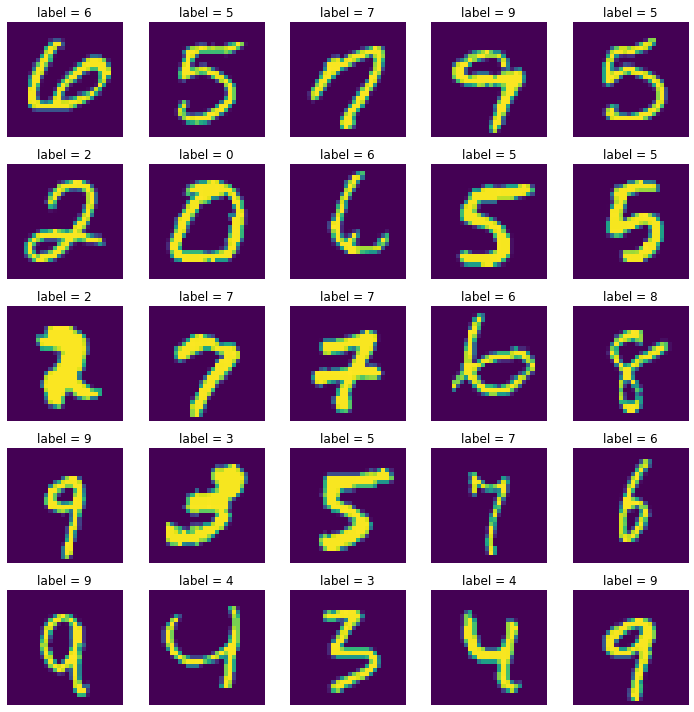

In [30]:
import matplotlib.pyplot as plt

# carregando conjunto de dados
data = pd.read_csv('./sample_data/mnist_train_small.csv', header = None)

# crianto a plot onde os números serão apresentados
fig, axs = plt.subplots(5, 5, figsize = (10, 10))

cont = 0
for i in range(5):
    for j in range(5):
        label = data.iloc[cont, 0]
        sample = data.iloc[cont, 1:].values.reshape(28, 28)
        cont += 1
        axs[i, j].imshow(sample)
        axs[i, j].set_title(f'label = {label}')
        axs[i, j].axis('off')

fig.tight_layout()

Podemos verificar também outras informações sobre esse conjunto de dado. Uma delas é a contagem de imagens por número, ou seja, quantas imagens de cada dígito exitem no dataset:

In [31]:
# há mais amostras com 1, 7 e 6 do que 5, 8 e 4...
data.iloc[:, 0].value_counts()

1    2243
7    2126
6    2039
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

In [32]:
# carregando o conjunto de dados
# como os conjuntos já foram separados em arquivos diferentes podemos carregá-los direto
# para as variáveis xtrain, ytrain, etc...

# dados de treinamento
all_mnist = pd.read_csv('./sample_data/mnist_train_small.csv', header = None)
xtrain = all_mnist.iloc[:, 1:]
ytrain = all_mnist.iloc[:, 0]

# dados de teste
test_mnist = pd.read_csv("./sample_data/mnist_test.csv", header = None)
xtest = test_mnist.iloc[:, 1:]
ytest = test_mnist.iloc[:, 0]

Note que ao lermos os dados utilizando a função `pd.read_csv()` estamos utilizando a opção `header = None`. Isso ocorre porque o conjunto de dados não possui um cabeçalho com os nomes dos atributos, quando esse é o caso podemos passar o argumento `header = None` para que nomes genéricos (neste caso: `1`, `2`, `3`, ...) sejam atribuidos automaticamente a cada um dos atributos.

Os valores presentes nesse conjunto de dados estão no intervalo [0, 255] por isso é necessário normalizá-los para a execução do treinamento das redes neurais. No entanto não será necessário normalizar o atributo alvo (já veremos o por quê)...


In [33]:
data_scaler = MinMaxScaler()

norm_xtrain = data_scaler.fit_transform(xtrain)
norm_xtest = data_scaler.transform(xtest)

### Scikit-Learn

Para utilizar uma rede neral para classificação devemos utilizar a classe `MLPClassifier`, (assim como utilizamos a veriante "regressor" anteriormente para os problemas de regressão). Neste caso os parâmetros utilizados são os mesmos, mas utilizados em uma rede que desempenhará uma tarefa de classificação.

In [34]:
rede_neural = MLPClassifier(hidden_layer_sizes = (256, 256, 32),
                            solver = 'adam',
                            early_stopping = True,
                            max_iter = 500,
                            verbose = True, # retire o comentário dessa linha para ver o progresso de treinameno
                            activation = 'relu')

rede_neural.fit(norm_xtrain, ytrain)

Iteration 1, loss = 0.54856116
Validation score: 0.931000
Iteration 2, loss = 0.19401212
Validation score: 0.949500
Iteration 3, loss = 0.13580831
Validation score: 0.956000
Iteration 4, loss = 0.09832086
Validation score: 0.958000
Iteration 5, loss = 0.07287170
Validation score: 0.965000
Iteration 6, loss = 0.04826722
Validation score: 0.964500
Iteration 7, loss = 0.03912898
Validation score: 0.966500
Iteration 8, loss = 0.02658425
Validation score: 0.965500
Iteration 9, loss = 0.01955680
Validation score: 0.967000
Iteration 10, loss = 0.01676378
Validation score: 0.966500
Iteration 11, loss = 0.01204663
Validation score: 0.966000
Iteration 12, loss = 0.00897888
Validation score: 0.972000
Iteration 13, loss = 0.00835546
Validation score: 0.967500
Iteration 14, loss = 0.00482383
Validation score: 0.971000
Iteration 15, loss = 0.00293047
Validation score: 0.968000
Iteration 16, loss = 0.00216157
Validation score: 0.971500
Iteration 17, loss = 0.00133259
Validation score: 0.972000
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 256, 32),
              max_iter=500, verbose=True)

Uma vez que a rede neural foi treinada podemos utilizar a função `verify_performance_classification()` para observarmos as métricas de Acurácia, *Racall* e *F1Score* do modelo que acabamos de treinar.

In [35]:
classes_esperadas, classes_preditas = verify_performance_classification(norm_xtrain,
                                                                        norm_xtest,
                                                                        ytrain,
                                                                        ytest,
                                                                        rede_neural)

------TESTE------
Acurácia: 	= 0.9718
Recall 		= 0.9716736865095728
F1 Score 	= 0.9715443632469721

------TREINAMENTO------
Acurácia: 	= 0.99735
Recall 		= 0.9973398860273897
F1 Score 	= 0.9973347285745298


### Keras/Tensorflow

Para utilizar o Keras para problemas de classificação não precisamos instanciar uma classe diferente da que utilizamos na regressão. Entretanto, devemos fazer algumas alterações na rede neural para que a rede possa ser traineda para realizar a classificação.

As mudanças que devemos fazer na Rede Neural são:

1. alterar a função de custo passada para o parâmetro `loss` no momento de compilar a rede no método `.compile()`.

1. Adicionar neurônios na camada de saída de forma que a quantidade de neurônios de saída seja a mesma quantidade de classes do problema (no caso no MNIST são 10 digitos possíveis -- 10 classes -- então devemos ter 10 neurôios na última camada)

1. alterar a função de ativação da última camada (camada de saída)


In [36]:
rede_neural = keras.Sequential([
    keras.layers.Flatten(),

    keras.layers.Dense(256, activation = 'relu', kernel_initializer = 'he_normal'),
    keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'he_normal'),

    # camada de saída com 10 neurônios (1 para cada número)
    keras.layers.Dense(10, activation = 'softmax'),
])

rede_neural.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'],
)

rede_neural.fit(norm_xtrain, ytrain,
                epochs = 100,
                validation_split = 0.1,
                callbacks = keras.callbacks.EarlyStopping(patience = 10))

Epoch 1/100
563/563 [==============================] - 2s 3ms/step - loss: 0.3826 - accuracy: 0.8893 - val_loss: 0.2218 - val_accuracy: 0.9350
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 0.1595 - accuracy: 0.9516 - val_loss: 0.1646 - val_accuracy: 0.9505
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 0.1063 - accuracy: 0.9692 - val_loss: 0.1476 - val_accuracy: 0.9590
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0715 - accuracy: 0.9784 - val_loss: 0.1326 - val_accuracy: 0.9590
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0470 - accuracy: 0.9869 - val_loss: 0.1489 - val_accuracy: 0.9565
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0362 - accuracy: 0.9902 - val_loss: 0.1520 - val_accuracy: 0.9560
Epoch 7/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.1484 - val_accuracy: 0.9600

In [37]:
classes_esperadas, classes_preditas = verify_performance_classification(norm_xtrain,
                                                                        norm_xtest,
                                                                        ytrain,
                                                                        ytest,
                                                                        rede_neural)

------TESTE------
Acurácia: 	= 0.9656
Recall 		= 0.9658883764330559
F1 Score 	= 0.9653382066568656

------TREINAMENTO------
Acurácia: 	= 0.98975
Recall 		= 0.9898612747085613
F1 Score 	= 0.9896399468679252


## Vegetation Covertypes

Dataset contendo informações tais como elevação, tipo do solo, inclinação (...) sobre coberturas vegetais. O objetivo é observar as informações de cada localidade e treinar uma rede neural para classificar o tipo de cobertura vegetal presente, predominantemente, na região de coleta de dados.


Mais informações sobre o conjunto de dados: https://archive.ics.uci.edu/ml/datasets/Covertype


Para carregar esse conjunto de dados iremos utilizar a função `fetch_covtype()`, essa função irá realizar o download dos dados, então é normal que ela demore um pouco para terminar a sua execução.

In [38]:
from sklearn.datasets import fetch_covtype

# Carregando o conjunto de dados para a memoria
data, target = fetch_covtype(return_X_y = True, as_frame = True)

KeyboardInterrupt: ignored

Podemos observar que esse dataset é o maior dentre os que já lidamos até agora: ele possui quase 600 mil amostras (datasets com esse tamanho não são incomuns). Podemos realizar os mesmos procedimentos de antes para obtermos informações sobre os dados:

In [ ]:
# verificando informações sobre os atributos utilizados no treinamento
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
# verificando a quantidade de amostras por classe (target)
target.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

**Atenção!**: Observe o seguinte: neste conjunto de dados temos muito mais amostras das classes 2 e 1 do que 4, 5 e 6. Isso faz com que o conjunto de dados seja **desbalanceado**, ou seja, há um diferença grande na participação percentual de cada classe na composição do conjunto de dados.

Durante o treinamento devemos considerar esse desbalanceamento no momento de separar as amostras para teste e treinamento, a ideia é tentar preservar a mesma porcentagem de amostras em cada uma das classes nos conjuntos de treinamento e teste.

-------

**Exemplo:** Imagine um conjunto de dados com 100 amostras e 2 classes. Dentre essas classes há 80 amostras da classe positiva e 20 da classe negativa, ou seja, o conjunto de dados está desbalanceado. Para que o treinamento e teste sejam conduzidos de maneira correta precisamos que nos conjuntos de teste e treinamento a porcentagem de amostras da classe positiva sejam de 80% positiva para 20% negativa. Dessa forma, se formos dividir esse conjunto de 100 amostras e 90% treinamento e 10% teste teremos:

- conjunto de treinamento com 90 amostras nas quais 72 são da classe positiva e 18 são da classe negativa:
\begin{equation}
    \text{em 90 amostras} \rightarrow \dfrac{72}{18} 
\end{equation}

- conjunto de teste com 10 amostras nas quais 8 são da classe positiva e 2 são da classe negativa:
\begin{equation}
    \text{em 10 amosras} \rightarrow \dfrac{8}{2} 
\end{equation}

Assim preservamos a diferença relativa entre as classes nos conjuntos:

\begin{equation}
    \dfrac{72}{18} = \dfrac{8}{2} = \dfrac{80}{20}
\end{equation}

A este processo damos o nome de **Estratificação**.



In [ ]:
# se temos 7 classes, os valores das classes devem ser [0, 6], mas os dados originais tem 
# esses valores nos intervalos [1, 7].
corrected_target = target.apply(lambda classe: classe - 1)


# separação entre treinamento e teste
# note que podemos passar qual é o atributo em relação ao qual 
# a estratificação deve ser feita por meio do argumento `stratify`:
xtrain, xtest, ytrain, ytest = train_test_split(data, corrected_target,
                                                stratify = target,
                                                shuffle = True,
                                                train_size = 0.9)

# normaliação dos dados 
data_scaler = MinMaxScaler()

norm_xtrain = data_scaler.fit_transform(xtrain)
norm_xtest = data_scaler.transform(xtest)

### Scikit-Learn

In [ ]:
# essa demora bastante...
rede_neural = MLPClassifier(hidden_layer_sizes = (300, 300, 150),
                            solver = 'adam',
                            activation = 'relu',
                            early_stopping = True,
                            max_iter = 30,
                            verbose = True, # retire essa linha para esconder o progresso do treinamento
                            n_iter_no_change = 4,
                            alpha = 1e-5)

rede_neural.fit(norm_xtrain, ytrain)

Iteration 1, loss = 0.59452875
Validation score: 0.779694
Iteration 2, loss = 0.46902609
Validation score: 0.814308
Iteration 3, loss = 0.40423156
Validation score: 0.842210
Iteration 4, loss = 0.36364102
Validation score: 0.851638
Iteration 5, loss = 0.33331306
Validation score: 0.860033
Iteration 6, loss = 0.30976355
Validation score: 0.877799
Iteration 7, loss = 0.29208537
Validation score: 0.879444
Iteration 8, loss = 0.27600019
Validation score: 0.890593
Iteration 9, loss = 0.26269423
Validation score: 0.890899
Iteration 10, loss = 0.25150093
Validation score: 0.894494
Iteration 11, loss = 0.24251918
Validation score: 0.900193
Iteration 12, loss = 0.23349704
Validation score: 0.905471
Iteration 13, loss = 0.22571200
Validation score: 0.906122
Iteration 14, loss = 0.21841969
Validation score: 0.909965
Iteration 15, loss = 0.21235770
Validation score: 0.902909
Iteration 16, loss = 0.20851540
Validation score: 0.913369
Iteration 17, loss = 0.20243735
Validation score: 0.912968
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, early_stopping=True,
              hidden_layer_sizes=(300, 300, 150), max_iter=30,
              n_iter_no_change=4, verbose=True)

In [ ]:
classes_esperadas, classes_preditas = verify_performance_classification(norm_xtrain,
                                                                        norm_xtest,
                                                                        ytrain,
                                                                        ytest,
                                                                        rede_neural)

------TESTE------
Acurácia: 	= 0.9313792984750955
Recall 		= 0.9150183563309469
F1 Score 	= 0.9033800500186919

------TREINAMENTO------
Acurácia: 	= 0.9403759729207704
Recall 		= 0.9294624569431464
F1 Score 	= 0.9204568576948284


### Keras/Tensorflow

Novamente, lembre-se de que devemos modificar a definição das redes neurais para que elas se ajustem à tarefa de classificação. Devemos mudar o número de neurôios na camada de saída, a função de ativação da camada de saída e a função de custo (parâmetro `loss` no momento da compilação do modelo).

In [ ]:
rede_neural_keras = keras.Sequential([
    keras.layers.Dense(300, activation = 'relu', kernel_initializer = 'he_normal'),
    keras.layers.Dense(300, activation = 'relu', kernel_initializer = 'he_normal'),
    keras.layers.Dense(150, activation = 'relu', kernel_initializer = 'he_normal'),
    keras.layers.Dense(50, activation = 'relu', kernel_initializer = 'he_normal'),

    # camada de saída com a mesma quantidade de neurônios igual a quantidade de classes
    keras.layers.Dense(7, activation = 'softmax'),
])

rede_neural_keras.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'nadam',
    metrics = ['accuracy'],
)

rede_neural_keras.fit(norm_xtrain, ytrain,
                      epochs = 30,
                      validation_split = 0.05,
                      callbacks = keras.callbacks.EarlyStopping(patience = 4))

Epoch 1/30
15524/15524 [==============================] - 75s 5ms/step - loss: 0.5042 - accuracy: 0.7830 - val_loss: 0.4139 - val_accuracy: 0.8226
Epoch 2/30
15524/15524 [==============================] - 74s 5ms/step - loss: 0.3580 - accuracy: 0.8498 - val_loss: 0.3225 - val_accuracy: 0.8658
Epoch 3/30
15524/15524 [==============================] - 75s 5ms/step - loss: 0.3028 - accuracy: 0.8741 - val_loss: 0.2914 - val_accuracy: 0.8806
Epoch 4/30
15524/15524 [==============================] - 72s 5ms/step - loss: 0.2703 - accuracy: 0.8884 - val_loss: 0.2737 - val_accuracy: 0.8893
Epoch 5/30
15524/15524 [==============================] - 76s 5ms/step - loss: 0.2496 - accuracy: 0.8973 - val_loss: 0.2400 - val_accuracy: 0.9019
Epoch 6/30
15524/15524 [==============================] - 74s 5ms/step - loss: 0.2336 - accuracy: 0.9040 - val_loss: 0.2378 - val_accuracy: 0.9050
Epoch 7/30
15524/15524 [==============================] - 74s 5ms/step - loss: 0.2216 - accuracy: 0.9092 - val_loss: 0

In [ ]:
classes_esperadas, classes_preditas = verify_performance_classification(norm_xtrain,
                                                                        norm_xtest,
                                                                        ytrain,
                                                                        ytest,
                                                                        rede_neural)

# Salvando e Carregando Modelos Treinados

Agora que já temos uma ideia geral de como treinar as Redes Neurais, é interessante que elas sejam armazenadas em um arquivo para que possam ser utilziadas no futuro para a tarefa para a qual foram treinadas. Caso contrário do que serviria apenas treiná-las se não vamos utilizá-las depois?

O processo para salvar e carregar as redes tanto utilizando Keras quando o Scikit-Learn é bastante parecido e simples:

## Scikit-Learn

Para salvar e carregar os modelos treinados como Scikit-Learn devemos utilizar o pacote `Joblib` (como vimos no dia anterior, o joblib pode ser utilizado para salvar praticamente qualquer objeto do Python). Para salvar utilizamos:

Documentação (`dump`): https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html

Documentação (`load`): https://joblib.readthedocs.io/en/latest/generated/joblib.load.html#joblib.load

In [ ]:
import joblib

# salvando a rede neural treinada em um arquivo
joblib.dump(value = rede_neural, filename = "minha_rede_neural_do_scikit.dat")

# carregando uma rede neural treinada para um 
rede_neural_treinada = joblib.load('minha_outra_rede_neural.dat')

## Keras/Tensorflow

Carregar e salvar modelos com o Keras é igualmente simples:

A única ressalva é que os modelos salvos e carregados pelo Keras devem todos estar no formato `.h5`, tirando essa pequena diferença o processo é praticamente o mesmo (e não requer nenhuma biblioteca de terceiros para salvar e carregar):

Documentação: https://keras.io/api/models/model_saving_apis/

In [ ]:
# salvando a rede treinada com o keras 
rede_neural_keras.save("rede_treinada_com_keras.h5")

# carregando uma outra rede neural treinadao com o keras
rede_neural_keras = keras.models.load_model("outra_rede_do_keras.h5")

OSError: ignored